## **Import Libraries**

In [223]:
import pandas as pd

In [224]:
import numpy as np

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
import seaborn as sns 

In [227]:
import matplotlib.pyplot as plt

In [228]:
from sklearn import preprocessing

In [229]:
import tensorflow as tf

In [230]:
from keras.preprocessing.text import Tokenizer

In [231]:
from sklearn.feature_extraction.text import CountVectorizer

In [232]:
from keras.models import Sequential

In [233]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [234]:
import nltk
# Importing StopWords, to remove stopwords from the dataset
from nltk.corpus import stopwords

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
# Decision Tree Classifier is the Machine Learning Model 
from sklearn.tree import DecisionTreeClassifier

In [237]:
# To implement the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [238]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [239]:
from catboost import CatBoostClassifier

In [240]:
# Classification Report shows us the recall score, percision and accuracy score
from sklearn.metrics import classification_report

In [241]:
# Accuracy Score
from sklearn.metrics import accuracy_score

In [242]:
from sklearn.metrics import roc_curve, roc_auc_score

In [243]:
from sklearn.metrics import confusion_matrix, f1_score

In [244]:
# Paddding the Sequences to have the same length
from keras.preprocessing.sequence import pad_sequences

In [245]:
# From Keras Layers importing the LSTM, CONV1D, Dense, Max Pooling and Dropout Layers
from keras.layers import LSTM,Bidirectional, GRU, SimpleRNN, Activation, Dropout, Dense, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, SpatialDropout1D

In [246]:
# Importing the Embedding Layer from keras layers
from keras.layers.embeddings import Embedding

In [247]:
from sklearn.model_selection import RandomizedSearchCV


## **Load the Dataset**

In [248]:
data = pd.read_csv("/content/2020-12-31-DynamicallyGeneratedHateDataset-entries-v0.1.csv")

In [249]:
data.head()

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm


In [250]:
data.tail()

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
40618,40736,9995,we should forcibly remove all the foreigners f...,hate,notgiven,True,0.86945,dynabench entry,1,train,cagnluiznm
40619,40737,9996,we should forcibly remove all the immigrants f...,hate,notgiven,True,0.50039,dynabench entry,1,train,cagnluiznm
40620,40738,9997,dalits are unworthy of the Gods love,hate,notgiven,True,0.97652,dynabench entry,1,train,cagnluiznm
40621,40739,9998,dalits are worthless,hate,notgiven,True,0.94326,dynabench entry,1,train,cagnluiznm
40622,40740,9999,dalits are deserves to be treated as lowlife,hate,notgiven,True,0.94324,dynabench entry,1,train,cagnluiznm


### **Data Pre-processing**

In [251]:
data = data[["text", "label"]]

In [252]:
data.head()

,text,label
0,It should be legal for a husband to rape his wife,hate
1,dalits are lowlife scum,hate
2,dalits are lowlives,hate
3,It was a better world when women dare not ques...,hate
4,I don't work this hard so that those immigrant...,hate


In [253]:
data["label"].value_counts()

hate       22124
nothate    18499
Name: label, dtype: int64

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40623 entries, 0 to 40622
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40623 non-null  object
 1   label   40623 non-null  object
dtypes: object(2)
memory usage: 634.9+ KB


In [255]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [256]:
data.dtypes

text     object
label    object
dtype: object

In [257]:
label_encoder = preprocessing.LabelEncoder()

In [258]:
data["label"] = label_encoder.fit_transform(data["label"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [259]:
data["label"].value_counts()

0    22124
1    18499
Name: label, dtype: int64

In [260]:
data["text"]

0        It should be legal for a husband to rape his wife
1                                  dalits are lowlife scum
2                                      dalits are lowlives
3        It was a better world when women dare not ques...
4        I don't work this hard so that those immigrant...
                               ...                        
40618    we should forcibly remove all the foreigners f...
40619    we should forcibly remove all the immigrants f...
40620                 dalits are unworthy of the Gods love
40621                                 dalits are worthless
40622         dalits are deserves to be treated as lowlife
Name: text, Length: 40623, dtype: object

## **DATA CLEANING**

In [261]:
class data_clearning:
  def __init__(self, x):
    self.x = x
    #self.y = y
  def data_cleaning_main_function(self):
    # Removing the URLS's from the Data
    # To remove the URL's from the data the str.replace method is used, we call the replace with regex string, that finds the URL
    # and replace them with empty strings, the str.strip method removes the space from the Beginning and at the end of the string
    self.x = self.x.str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
    # Lowering the Sentences
    # To lower all the capital letters in the data
    self.x = self.x.apply(lambda x: x.lower())
    # Removing the Punctuation Marks from the Data, the str.replace method is used, we call the replace with the regex string,
    # that finds all the punctuation marks from the data and replace them with empty strings
    # the str.strip methods remove the space from the Beginning and at the End of the String
    self.x = self.x.str.replace(r'[^\w\s]+', ' ').str.strip()
    nltk.download('stopwords')
    stop = set(stopwords.words("english"))
    def remove_stopwords(text):
        filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
        return " ".join(filtered_words)
    self.x = self.x.map(remove_stopwords)
    return self.x


In [262]:
dc = data_clearning(data["text"])
data["text"]  = dc.data_cleaning_main_function()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0 Represents Hate

1 Represents Non- Hate

In [263]:
data.head()

,text,label
0,legal husband rape wife,0
1,dalits lowlife scum,0
2,dalits lowlives,0
3,better world women dare question men,0
4,work hard immigrants take benefits,0


In [264]:
data.tail()

,text,label
40618,forcibly remove foreigners,0
40619,forcibly remove immigrants,0
40620,dalits unworthy gods love,0
40621,dalits worthless,0
40622,dalits deserves treated lowlife,0


## **Train & Test Split**

In [265]:
X = data["text"]

In [266]:
y = data["label"]

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


## **IMPLEMENTING THE COUNT VECTORIZER**

In [268]:
vec = CountVectorizer(stop_words='english', max_features = 2000)

In [269]:
X_train_BOW = vec.fit_transform(X_train).toarray()

In [270]:
X_test_BOW = vec.transform(X_test).toarray()

In [271]:
X_train_BOW

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [272]:
X_test_BOW

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

## **Implementing the Naive Bayes Classifier**


In [273]:
# Create and fit the random forest
model = MultinomialNB()
model.fit(X_train_BOW, y_train)

# Evaluate predictions
Y_pred = model.predict(X_test_BOW)
acc_decision_NB = round(model.score(X_test_BOW, y_test) * 100, 2)
# Printing the Classification Report
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_NB)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 67.26
              precision    recall  f1-score   support

           0   0.675116  0.762554  0.716176      4401
           1   0.668675  0.566327  0.613260      3724

    accuracy                       0.672615      8125
   macro avg   0.671895  0.664440  0.664718      8125
weighted avg   0.672164  0.672615  0.669005      8125



Predicted,0,1,All
Actual,,,
0,3356,1045,4401
1,1615,2109,3724
All,4971,3154,8125


## **ROC Curve**

Naive Bayes Classifier Prediction: AUROC = 0.728


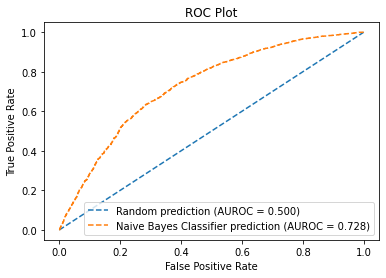

In [274]:

r_probs = [0 for _ in range(len(y_test))]
rf_probs = model.predict_proba(X_test_BOW)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
r_auc = roc_auc_score(y_test, r_probs)
print('Naive Bayes Classifier Prediction: AUROC = %.3f' % (rf_auc))
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Naive Bayes Classifier prediction (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## **Confusion Matrix**

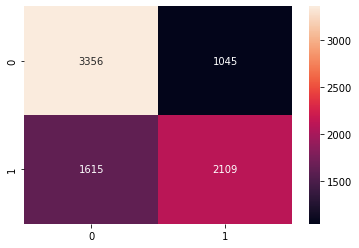

In [275]:
# confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

## **Implementing the CatBoost Classifier**

In [276]:
model = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1
)
model.fit(X_train_BOW, y_train)

# Evaluate predictions
Y_pred = model.predict(X_test_BOW)
acc_decision_CB = round(model.score(X_test_BOW, y_test) * 100, 2)
# Printing the Classification Report
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_CB)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

0:	learn: 0.6888049	total: 21ms	remaining: 83.9ms
1:	learn: 0.6846727	total: 41.2ms	remaining: 61.8ms
2:	learn: 0.6821402	total: 60.1ms	remaining: 40ms
3:	learn: 0.6795761	total: 79.3ms	remaining: 19.8ms
4:	learn: 0.6773810	total: 98.5ms	remaining: 0us
Accuracy 57.16
              precision    recall  f1-score   support

           0   0.565230  0.905703  0.696062      4401
           1   0.613234  0.176692  0.274338      3724

    accuracy                       0.571569      8125
   macro avg   0.589232  0.541197  0.485200      8125
weighted avg   0.587232  0.571569  0.502770      8125



Predicted,0,1,All
Actual,,,
0,3986,415,4401
1,3066,658,3724
All,7052,1073,8125


## **Creating the ROC Curve**

Cat Boost Classifier Prediction: AUROC = 0.605


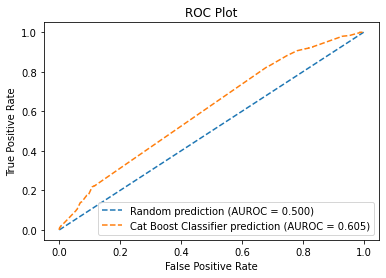

In [277]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = model.predict_proba(X_test_BOW)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
r_auc = roc_auc_score(y_test, r_probs)
print('Cat Boost Classifier Prediction: AUROC = %.3f' % (rf_auc))
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Cat Boost Classifier prediction (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## **Confusion Matrix**

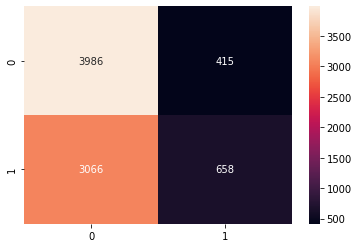

In [278]:
# confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

## **Implementing the TF-IDF**

In [279]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 2000)

In [280]:
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

## **Implementing the Random Forest Classifier**

In [281]:
# Create and fit the random forest
model = RandomForestClassifier()
model.fit(X_train_vectors_tfidf, y_train)

# Evaluate predictions
Y_pred = model.predict(X_test_vectors_tfidf)
acc_decision_RF = round(model.score(X_test_vectors_tfidf, y_test) * 100, 2)
# Printing the Classification Report
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_RF)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 68.94
              precision    recall  f1-score   support

           0   0.693785  0.763463  0.726958      4401
           1   0.682815  0.601772  0.639737      3724

    accuracy                       0.689354      8125
   macro avg   0.688300  0.682618  0.683348      8125
weighted avg   0.688757  0.689354  0.686981      8125



Predicted,0,1,All
Actual,,,
0,3360,1041,4401
1,1483,2241,3724
All,4843,3282,8125


## **ROC Curve**

Random Forest Classifier Prediction: AUROC = 0.758


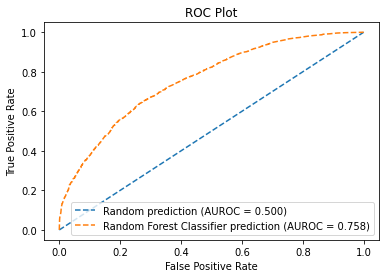

In [282]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = model.predict_proba(X_test_vectors_tfidf)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
r_auc = roc_auc_score(y_test, r_probs)
print('Random Forest Classifier Prediction: AUROC = %.3f' % (rf_auc))
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest Classifier prediction (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## **Confusion Matrix**

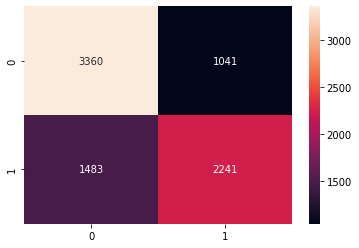

In [283]:
# confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

# Implementing the Decision Tree Classiifer

In [284]:
# Create and fit the random forest
model = DecisionTreeClassifier()
model.fit(X_train_vectors_tfidf, y_train)

# Evaluate predictions
Y_pred = model.predict(X_test_vectors_tfidf)
acc_decision_RF = round(model.score(X_test_vectors_tfidf, y_test) * 100, 2)
# Printing the Classification Report
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_RF)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 65.99
              precision    recall  f1-score   support

           0   0.671053  0.730061  0.699314      4401
           1   0.643992  0.577068  0.608696      3724

    accuracy                       0.659938      8125
   macro avg   0.657522  0.653565  0.654005      8125
weighted avg   0.658650  0.659938  0.657780      8125



Predicted,0,1,All
Actual,,,
0,3213,1188,4401
1,1575,2149,3724
All,4788,3337,8125


Decision Tree Classifier Prediction: AUROC = 0.653


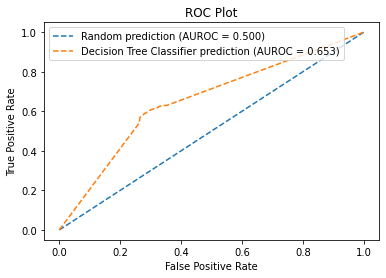

In [285]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = model.predict_proba(X_test_vectors_tfidf)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
r_auc = roc_auc_score(y_test, r_probs)
print('Decision Tree Classifier Prediction: AUROC = %.3f' % (rf_auc))
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Decision Tree Classifier prediction (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

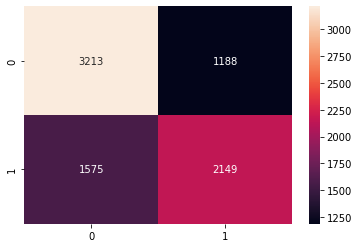

In [286]:
# confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

### **Implementing the Tokenizer**

In [287]:
## Tokenize the sentences
tokenizer = Tokenizer(num_words = 20294)
tokenizer.fit_on_texts(list(X_train)+ list(X_test))

In [288]:
vocab_size = len(tokenizer.word_index) + 1

In [289]:
len(tokenizer.word_index)

20294

In [290]:
tokenizer.word_index

{'people': 1,
 'black': 2,
 'women': 3,
 'fucking': 4,
 'like': 5,
 'love': 6,
 'think': 7,
 'would': 8,
 'white': 9,
 'get': 10,
 'want': 11,
 'one': 12,
 'everyone': 13,
 'men': 14,
 'hate': 15,
 'know': 16,
 'country': 17,
 'really': 18,
 'fuck': 19,
 'shit': 20,
 'many': 21,
 'world': 22,
 'wrong': 23,
 'go': 24,
 'muslims': 25,
 'much': 26,
 'say': 27,
 'let': 28,
 'even': 29,
 'feel': 30,
 'see': 31,
 'need': 32,
 'woman': 33,
 'getting': 34,
 'man': 35,
 'never': 36,
 'anyone': 37,
 'us': 38,
 'stop': 39,
 'time': 40,
 'good': 41,
 'tell': 42,
 'jews': 43,
 'already': 44,
 'around': 45,
 'trans': 46,
 'gay': 47,
 'nothing': 48,
 'make': 49,
 'allowed': 50,
 'way': 51,
 'look': 52,
 'lot': 53,
 'talk': 54,
 'society': 55,
 'immigrants': 56,
 'always': 57,
 'blacks': 58,
 'back': 59,
 'right': 60,
 'chinese': 61,
 'call': 62,
 'going': 63,
 'nice': 64,
 'opinion': 65,
 'every': 66,
 'stupid': 67,
 'common': 68,
 'else': 69,
 'life': 70,
 'come': 71,
 'muslim': 72,
 'live': 73,
 'u

In [291]:
# Now for each sentence a list is created and with respect to the word a unique number is assigned 
train_x = tokenizer.texts_to_sequences(X_train)
test_x = tokenizer.texts_to_sequences(X_test)

In [292]:
train_x[1]

[20, 371, 2029, 3699, 11, 1, 2151]

In [293]:
## Pad the sentences to have the same length 
train_x = pad_sequences(train_x, maxlen=20)
test_x = pad_sequences(test_x, maxlen= 20)

### **Implementing a 1-D Convolutional Neural Network**

In [294]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=80, input_length = train_x.shape[1]))
model.add(Conv1D(32,3,activation="relu"))
model.add(MaxPooling1D(2))
model.add(Conv1D(8,3,activation="relu"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [295]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 20, 80)            1623600   
                                                                 
 conv1d_16 (Conv1D)          (None, 18, 32)            7712      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 9, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 7, 8)              776       
                                                                 
 dropout_7 (Dropout)         (None, 7, 8)              0         
                                                                 
 flatten_5 (Flatten)         (None, 56)                0         
                                                      

In [296]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [297]:
history = model.fit(train_x, y_train, epochs=15, validation_data=(test_x, y_test))

Epoch 1/15
1016/1016 [==============================] - 6s 5ms/step - loss: 0.6264 - accuracy: 0.6354 - val_loss: 0.5340 - val_accuracy: 0.7243
Epoch 2/15
1016/1016 [==============================] - 5s 5ms/step - loss: 0.4779 - accuracy: 0.7726 - val_loss: 0.5084 - val_accuracy: 0.7338
Epoch 3/15
1016/1016 [==============================] - 5s 5ms/step - loss: 0.3623 - accuracy: 0.8398 - val_loss: 0.5629 - val_accuracy: 0.7335
Epoch 4/15
1016/1016 [==============================] - 5s 5ms/step - loss: 0.2803 - accuracy: 0.8839 - val_loss: 0.6361 - val_accuracy: 0.7302
Epoch 5/15
1016/1016 [==============================] - 5s 5ms/step - loss: 0.2218 - accuracy: 0.9087 - val_loss: 0.7799 - val_accuracy: 0.7282
Epoch 6/15
1016/1016 [==============================] - 5s 5ms/step - loss: 0.1821 - accuracy: 0.9258 - val_loss: 0.9692 - val_accuracy: 0.7262
Epoch 7/15
1016/1016 [==============================] - 5s 5ms/step - loss: 0.1599 - accuracy: 0.9375 - val_loss: 1.1435 - val_accuracy:

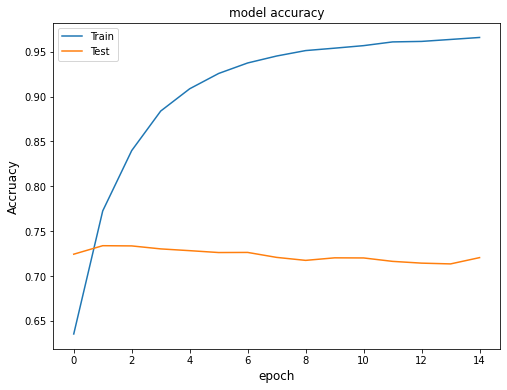

In [298]:
# summarize history for loss
plt.figure(figsize=(8, 6))


plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('Accruacy', fontsize = 12)

plt.xlabel('epoch', fontsize = 12)

plt.legend(['Train', "Test"], loc='upper left')

plt.show()

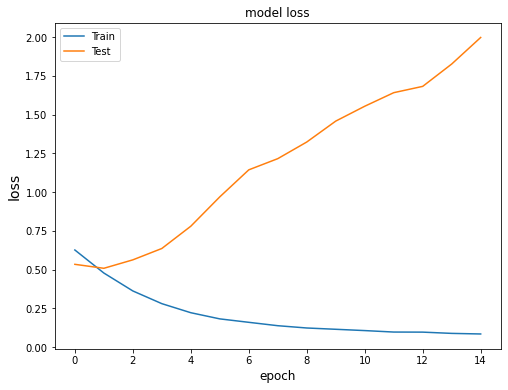

In [299]:
# summarize history for loss
plt.figure(figsize=(8, 6))

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss', fontsize = 14)

plt.xlabel('epoch', fontsize = 12)

plt.legend(['Train', "Test"], loc='upper left')
plt.show()

## **Implementing a Hybrid Deep Learning Model**

In [300]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length = train_x.shape[1]))
model.add(Conv1D(256,3,activation="relu"))
model.add(MaxPooling1D(2))
model.add(Conv1D(128,3,activation="relu"))
model.add(MaxPooling1D(2))
model.add(Conv1D(64,3,activation="relu"))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0, return_sequences = True, activation = "tanh", recurrent_activation = "sigmoid")))
model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0, return_sequences = True, activation = "tanh", recurrent_activation = "sigmoid")))
model.add(GRU(16, dropout=0.2, recurrent_dropout=0, return_sequences = True, activation = "tanh", recurrent_activation = "sigmoid"))
model.add(GRU(8, dropout=0.2, recurrent_dropout=0, return_sequences = True, activation = "tanh", recurrent_activation = "sigmoid"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [301]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 20, 100)           2029500   
                                                                 
 conv1d_18 (Conv1D)          (None, 18, 256)           77056     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 9, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 7, 128)            98432     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 3, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_20 (Conv1D)          (None, 1, 64)            

In [302]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [303]:
history = model.fit(train_x, y_train, epochs=15, validation_data=(test_x, y_test))

Epoch 1/15
1016/1016 [==============================] - 24s 15ms/step - loss: 0.6591 - accuracy: 0.5947 - val_loss: 0.6296 - val_accuracy: 0.6279
Epoch 2/15
1016/1016 [==============================] - 14s 14ms/step - loss: 0.5750 - accuracy: 0.6893 - val_loss: 0.6164 - val_accuracy: 0.6481
Epoch 3/15
1016/1016 [==============================] - 14s 13ms/step - loss: 0.4912 - accuracy: 0.7556 - val_loss: 0.6548 - val_accuracy: 0.6389
Epoch 4/15
1016/1016 [==============================] - 14s 14ms/step - loss: 0.4199 - accuracy: 0.8001 - val_loss: 0.7317 - val_accuracy: 0.6416
Epoch 5/15
1016/1016 [==============================] - 14s 14ms/step - loss: 0.3606 - accuracy: 0.8374 - val_loss: 0.7535 - val_accuracy: 0.6436
Epoch 6/15
1016/1016 [==============================] - 14s 14ms/step - loss: 0.3201 - accuracy: 0.8546 - val_loss: 0.8790 - val_accuracy: 0.6433
Epoch 7/15
1016/1016 [==============================] - 14s 13ms/step - loss: 0.2874 - accuracy: 0.8697 - val_loss: 0.9419 -

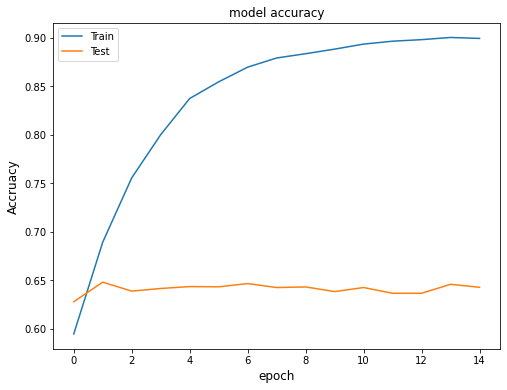

In [304]:
# summarize history for loss
plt.figure(figsize=(8, 6))


plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('Accruacy', fontsize = 12)

plt.xlabel('epoch', fontsize = 12)

plt.legend(['Train', "Test"], loc='upper left')

plt.show()

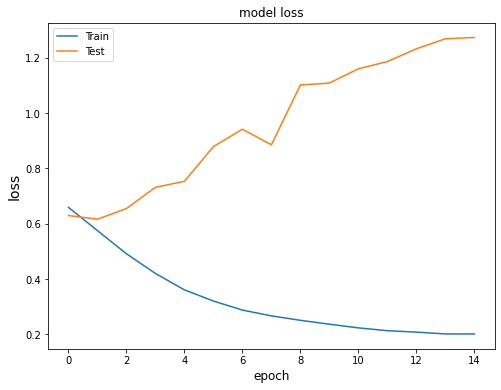

In [305]:
# summarize history for loss
plt.figure(figsize=(8, 6))

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss', fontsize = 14)

plt.xlabel('epoch', fontsize = 12)

plt.legend(['Train', "Test"], loc='upper left')
plt.show()

## **Implementing the Bi-Directional LSTM**

In [309]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length = train_x.shape[1]))
model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0, return_sequences = True, activation = "tanh", recurrent_activation = "sigmoid")))
model.add(Bidirectional(LSTM(16, dropout=0.2, recurrent_dropout=0, return_sequences = True, activation = "tanh", recurrent_activation = "sigmoid")))
model.add(Bidirectional(LSTM(8, dropout=0.2, recurrent_dropout=0, return_sequences = True, activation = "tanh", recurrent_activation = "sigmoid")))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 20, 100)           2029500   
                                                                 
 bidirectional_17 (Bidirecti  (None, 20, 64)           34048     
 onal)                                                           
                                                                 
 bidirectional_18 (Bidirecti  (None, 20, 32)           10368     
 onal)                                                           
                                                                 
 bidirectional_19 (Bidirecti  (None, 20, 16)           2624      
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 20, 16)            0         
                                                     

In [310]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [311]:
history = model.fit(train_x, y_train, epochs=15, validation_data=(test_x, y_test))

Epoch 1/15
1016/1016 [==============================] - 31s 23ms/step - loss: 0.5979 - accuracy: 0.6706 - val_loss: 0.5344 - val_accuracy: 0.7083
Epoch 2/15
1016/1016 [==============================] - 17s 17ms/step - loss: 0.4536 - accuracy: 0.7821 - val_loss: 0.5325 - val_accuracy: 0.7273
Epoch 3/15
1016/1016 [==============================] - 17s 17ms/step - loss: 0.3642 - accuracy: 0.8283 - val_loss: 0.5918 - val_accuracy: 0.7309
Epoch 4/15
1016/1016 [==============================] - 17s 17ms/step - loss: 0.2967 - accuracy: 0.8627 - val_loss: 0.6684 - val_accuracy: 0.7350
Epoch 5/15
1016/1016 [==============================] - 17s 17ms/step - loss: 0.2506 - accuracy: 0.8863 - val_loss: 0.7654 - val_accuracy: 0.7342
Epoch 6/15
1016/1016 [==============================] - 18s 18ms/step - loss: 0.2152 - accuracy: 0.9043 - val_loss: 0.7623 - val_accuracy: 0.7328
Epoch 7/15
1016/1016 [==============================] - 17s 17ms/step - loss: 0.1849 - accuracy: 0.9202 - val_loss: 0.9315 -

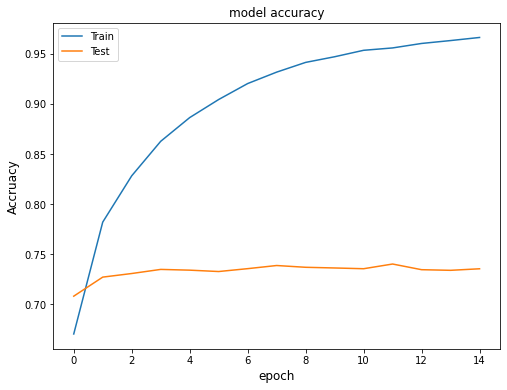

In [312]:
# summarize history for loss
plt.figure(figsize=(8, 6))


plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('Accruacy', fontsize = 12)

plt.xlabel('epoch', fontsize = 12)

plt.legend(['Train', "Test"], loc='upper left')

plt.show()

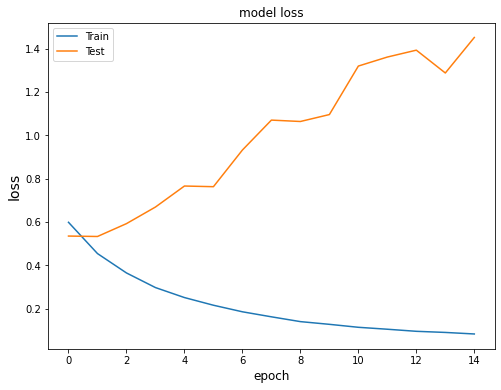

In [313]:
# summarize history for loss
plt.figure(figsize=(8, 6))

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss', fontsize = 14)

plt.xlabel('epoch', fontsize = 12)

plt.legend(['Train', "Test"], loc='upper left')
plt.show()